In [94]:
import pandas as pd
from datetime import timedelta, date

## my personal bank statments, exported as a csv and stored locally on my machine
spending_df = pd.read_csv('~/datasets/bank/spending_15Oct.CSV').set_index('Date')
spending_df = spending_df.drop('Unnamed: 2', 1)
saving_df = pd.read_csv('~/datasets/bank/saving_15Oct.CSV').set_index('Date')
saving_df = saving_df.drop('Unnamed: 2', 1)

In [95]:
print(spending_df.head())
print()
print(saving_df.head())

                                 Description  Delta  Balance
Date                                                        
18 Oct 2018    TRANSFER FROM J D SHEA - 02 ;   20.0    20.73
18 Oct 2018    POS W/D FOUR SQUARE H-16:52 ;  -20.0     0.73
19 Oct 2018    TRANSFER FROM J D SHEA - 02 ;    9.0     9.73
19 Oct 2018  TWL 134 WELLINGTON WELLINGTON ;   -9.0     0.73
26 Oct 2018    TRANSFER FROM J D SHEA - 02 ;   12.0    12.73

                             Description  Delta  Balance
Date                                                    
18 Oct 2018  TRANSFER TO J D SHEA - 01 ;  -20.0   1872.3
19 Oct 2018  TRANSFER TO J D SHEA - 01 ;   -9.0   1863.3
26 Oct 2018  TRANSFER TO J D SHEA - 01 ;  -12.0   1851.3
26 Oct 2018  TRANSFER TO J D SHEA - 01 ;   -3.0   1848.3
31 Oct 2018            INTEREST CREDIT ;    2.0   1850.3


In [96]:
## taken from answer on stackoverflow
## link: https://tinyurl.com/y2ufeqwe 
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

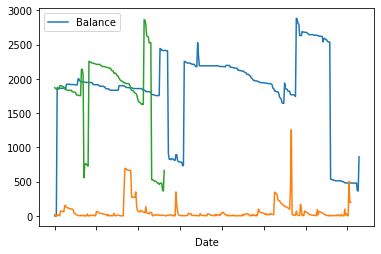

In [113]:
spending_bal = spending_df['Balance']
spending_closing_bal = 0
saving_bal = saving_df['Balance']
saving_closing_bal = 0

conbined_balances = []

for day in daterange(date(2018, 10, 15), date(2019, 10, 15)):
    day_fmt = day.strftime("%d %b %Y")
    try:
        spending_closing_bal = spending_bal[day_fmt][-1:].item()
    except IndexError:
        spending_closing_bal = spending_bal[day_fmt]
    except KeyError:
        pass
    try:
        saving_closing_bal = saving_bal[day_fmt][-1:].item()
    except IndexError:
        saving_closing_bal = saving_bal[day_fmt]
    except KeyError:
        pass
    
    conbined_balances.append({'Date': day_fmt, 'Balance': (spending_closing_bal + saving_closing_bal)})
    
combined_bal = pd.DataFrame(data=conbined_balances).set_index('Date')
combined_bal.plot()
spending_bal.plot()
saving_bal.plot()
        
    